## 데이터 준비
- 다운로드한 csv 파일 정리
- 엑셀을 실행하여 열 구분자로 데이터 나누기 실행

In [8]:
import pandas as pd
red_df = pd.read_csv('data/winequality-red.csv', sep=";", header=0, engine='python')
white_df = pd.read_csv('data/winequality-white.csv' , sep=";", header=0, engine='python')
red_df.to_csv('data/winquality-red2.csv', index=False)
white_df.to_csv('data/winquality-white2.csv', index=False)

- 데이터 병합하기

In [9]:
# 레드와인과 화이트 와인 합치기
print(red_df.head())
red_df.insert(0, column='type', value='red')
print(red_df.head())
print(red_df.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [10]:
# 레드와인과 화이트 와인 합치기
print(white_df.head())
white_df.insert(0, column='type', value='white')
print(white_df.head())
print(white_df.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [12]:
wine=pd.concat([red_df, white_df])
print(wine.shape)
print(red_df.shape)
print(white_df.shape)

(6497, 13)
(1599, 13)
(4898, 13)


In [13]:
wine.to_csv('data/wine.csv', index=False)

# 데이터 탐색하기
- 기본정보 확인
- wine 데이터셋 필드 
- type                  : 와인 타입(red, white)
- fixed acidity         : 결합산 - 주로 타르타산(tartaric), 사과산(malic)으로 구성, 완인의 산도 제어
- volatile acidity      : 휘발산 - 와인의 향과 연관
- citric acid           : 구연산 - 와인의 신선함을 올려주는 역할, 산성화에 연관을 미침
- residual sugar        : 잔여 설탕 - 화인의 단맛을 올여줌
- chlorides             : 염화물 - 화인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분
- free sulfur dioxide   : 이산화 황 활성
- total sulfur dioxide  : 이산화 황 총량
- sulphates             : 황산염
- ** 황 화합물 : 황 화합물은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할 
    (free sulfur dioxide, total sulfur dioxide, sulphates)
- density               : 밀도 - 바디의 높고 낮음을 표현하는 와인의 무게감
- pH                    : 산성도 - 와인의 신맛의 정도를 나타냄
- alcohol               : 알코올 와인의 ㅌ
- quality               : 품질

In [14]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


- 함수 사용 기술 통계 구하기

In [27]:
wine.columns=wine.columns.str.replace(' ', '_')
print(wine.head())

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [28]:
print(wine.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [16]:
print(sorted(wine.quality.unique()))
print(wine.quality.value_counts())

[3, 4, 5, 6, 7, 8, 9]
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


## 데이터 모델링
- describe() 함수로 그룹 비교하기

In [18]:
print(wine.groupby('type')['quality'].describe())
print(wine.groupby('type')['quality'].mean())
print(wine.groupby('type')['quality'].std())
print(wine.groupby('type')['quality'].agg(['count',"mean", "std",'min','max']))

        count      mean       std  min  25%  50%  75%  max
type                                                      
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0
type
red      5.636023
white    5.877909
Name: quality, dtype: float64
type
red      0.807569
white    0.885639
Name: quality, dtype: float64
       count      mean       std  min  max
type                                      
red     1599  5.636023  0.807569    3    8
white   4898  5.877909  0.885639    3    9


## t-검정과 회귀분석으로 그룹 비교하기
- t-검정을 위해서는 scipy 라이브러리 패키지를 사용
- 회귀 분석을 위해서는 statsmodels 라이브러리 패키지를 사용
- 명령 프롬프트 창에서 다음과 같이 입력하여 statsmodels 패키지를 설치
- pip install statsmodels

In [19]:
# t-검정에 필요한 scipy 패키지의 stats 함수 로드
from scipy import stats
from statsmodels.formula.api import ols, glm

# 와인 샘플의 quality 값만 찾아서 저장
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

# scipy 패키지의 stats.ttest_ind() 함수를 사용하여 t-검정을 하고 두 그룹 간 차이를 확인
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [21]:
# 선형 회귀 분석식의 종속 변수(y)와 독립 변수(x1~x10)를 구성
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
            residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + \
            density + pH + sulphates + alcohol'

# 선형 회귀 모델 중에서 OLSOrdinary Least Squares 모델을 사용
regression_result = ols(Rformula, data = wine).fit()

# 선형 회귀 분석과 관련된 통계값을 출력
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:56:24   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# 1. 예측에 사용할 첫 번째 샘플 데이터 만들기
# wine 에서 quality와 type 열은 제외하고, 회귀 분석 모델에 사용할 독립 변수만 추출하여 sample1에 저장
sample1 = wine[wine.columns.difference(['quality', 'type'])]
# sample1에 있는 샘플 중에서 0번~4번 5개 샘플만 추출하고, sample1에 다시 저장하여 예측에 사용할 샘플을 제작
sample1 = sample1[0:5][:]
print(sample1)

   alcohol  chlorides  citric_acid  density  fixed_acidity  \
0      9.4      0.076         0.00   0.9978            7.4   
1      9.8      0.098         0.00   0.9968            7.8   
2      9.8      0.092         0.04   0.9970            7.8   
3      9.8      0.075         0.56   0.9980           11.2   
4      9.4      0.076         0.00   0.9978            7.4   

   free_sulfur_dioxide    pH  residual_sugar  sulphates  total_sulfur_dioxide  \
0                 11.0  3.51             1.9       0.56                  34.0   
1                 25.0  3.20             2.6       0.68                  67.0   
2                 15.0  3.26             2.3       0.65                  54.0   
3                 17.0  3.16             1.9       0.58                  60.0   
4                 11.0  3.51             1.9       0.56                  34.0   

   volatile_acidity  
0              0.70  
1              0.88  
2              0.76  
3              0.28  
4              0.70  


In [30]:
sample1_predict=regression_result.predict(sample1)
print('예측값: ',sample1_predict)
print('실제값: ',wine[0:5]['quality'])

예측값:  0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64
실제값:  0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [31]:
# 예측에 사용할 두 번째 샘플 데이터 만들기
# 회귀식에 사용한 독립 변수에 대입할 임의의 값을 딕셔너리 형태로 제작
data = {
    "fixed_acidity" : [8.5, 8.1], 
    "volatile_acidity":[0.8, 0.5],
    "citric_acid":[0.3, 0.4], 
    "residual_sugar":[6.1, 5.8], 
    "chlorides":[0.055, 0.04], 
    "free_sulfur_dioxide":[30.0, 31.0], 
    "total_sulfur_dioxide":[98.0,99], 
    "density":[0.996, 0.91], 
    "pH":[3.25, 3.01], 
    "sulphates":[0.4, 0.35],
    "alcohol":[9.0, 0.88]}
# 딕셔너리 형태의 값과 sample1의 열 이름만 뽑아 데이터프레임으로 묶은 sample2를 제작
sample2=pd.DataFrame(data, columns=sample1.columns)
# sample2를 출력하여 제대로 구성되었는지 확인
print(sample2)

   alcohol  chlorides  citric_acid  density  fixed_acidity  \
0     9.00      0.055          0.3    0.996            8.5   
1     0.88      0.040          0.4    0.910            8.1   

   free_sulfur_dioxide    pH  residual_sugar  sulphates  total_sulfur_dioxide  \
0                 30.0  3.25             6.1       0.40                  98.0   
1                 31.0  3.01             5.8       0.35                  99.0   

   volatile_acidity  
0               0.8  
1               0.5  


In [32]:
# 두 번째 샘플의 quality 예측하기
#샘플 데이터를 회귀 분석 모델 regression_result의 예측 함수 predict()에 적용하여 수행한 뒤 
# 결과 예측값을 sample2_predict에 저장
sample2_predict=regression_result.predict(sample2)
# sample2_predict를 출력하여 예측한 quality를 확인
print(sample2_predict)

0    4.809094
1    7.582129
dtype: float64


## 결과 시각화
- 와인 유형에 따른 품질 등급 히스토그램 그리기
- pip install seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


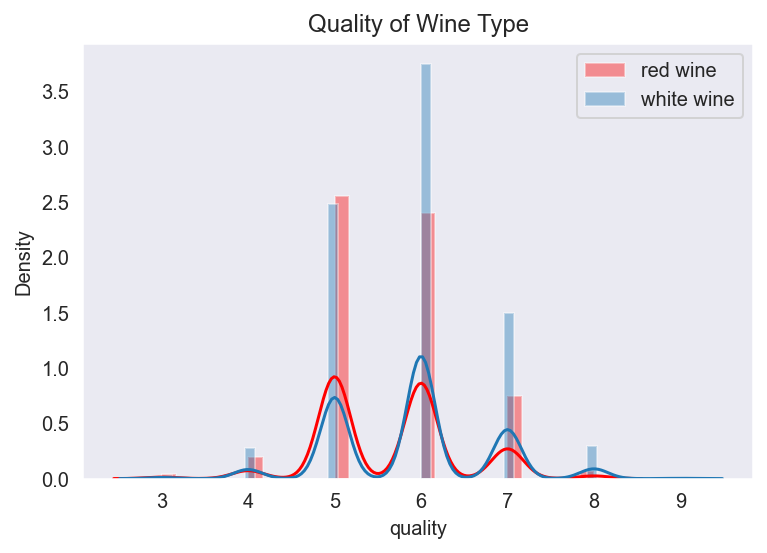

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 커널 밀도 추정(kde)을 적용한 히스토그램 그리기
# 히스토그램 차트의 배경색 스타일을 설정
sns.set_style('dark')
# 와인에 대한 distplot 객체를 생성
sns.distplot(red_wine_quality, kde=True, color="red", label="red wine")
sns.distplot(white_wine_quality, kde=True, label="white wine")

plt.title("Quality of Wine Type")
plt.legend() # 차트 범례 설정
plt.show()

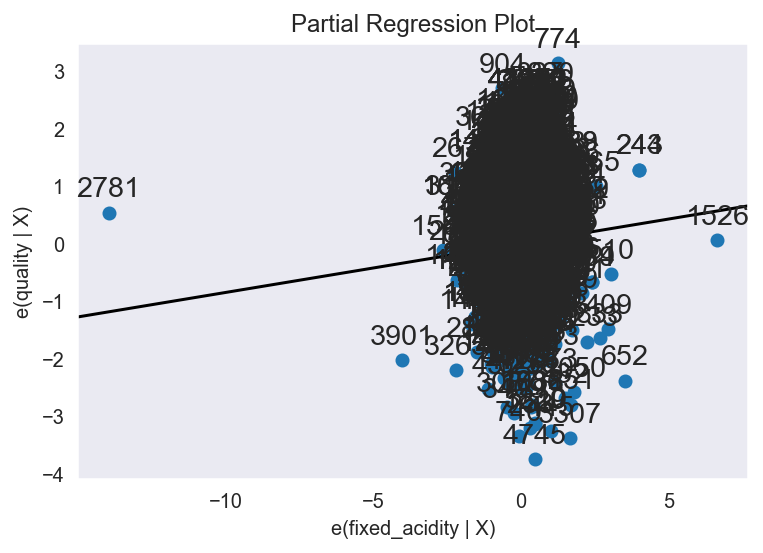

In [25]:
import statsmodels.api as sm

others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data =wine, ret_coords=True)
plt.show()

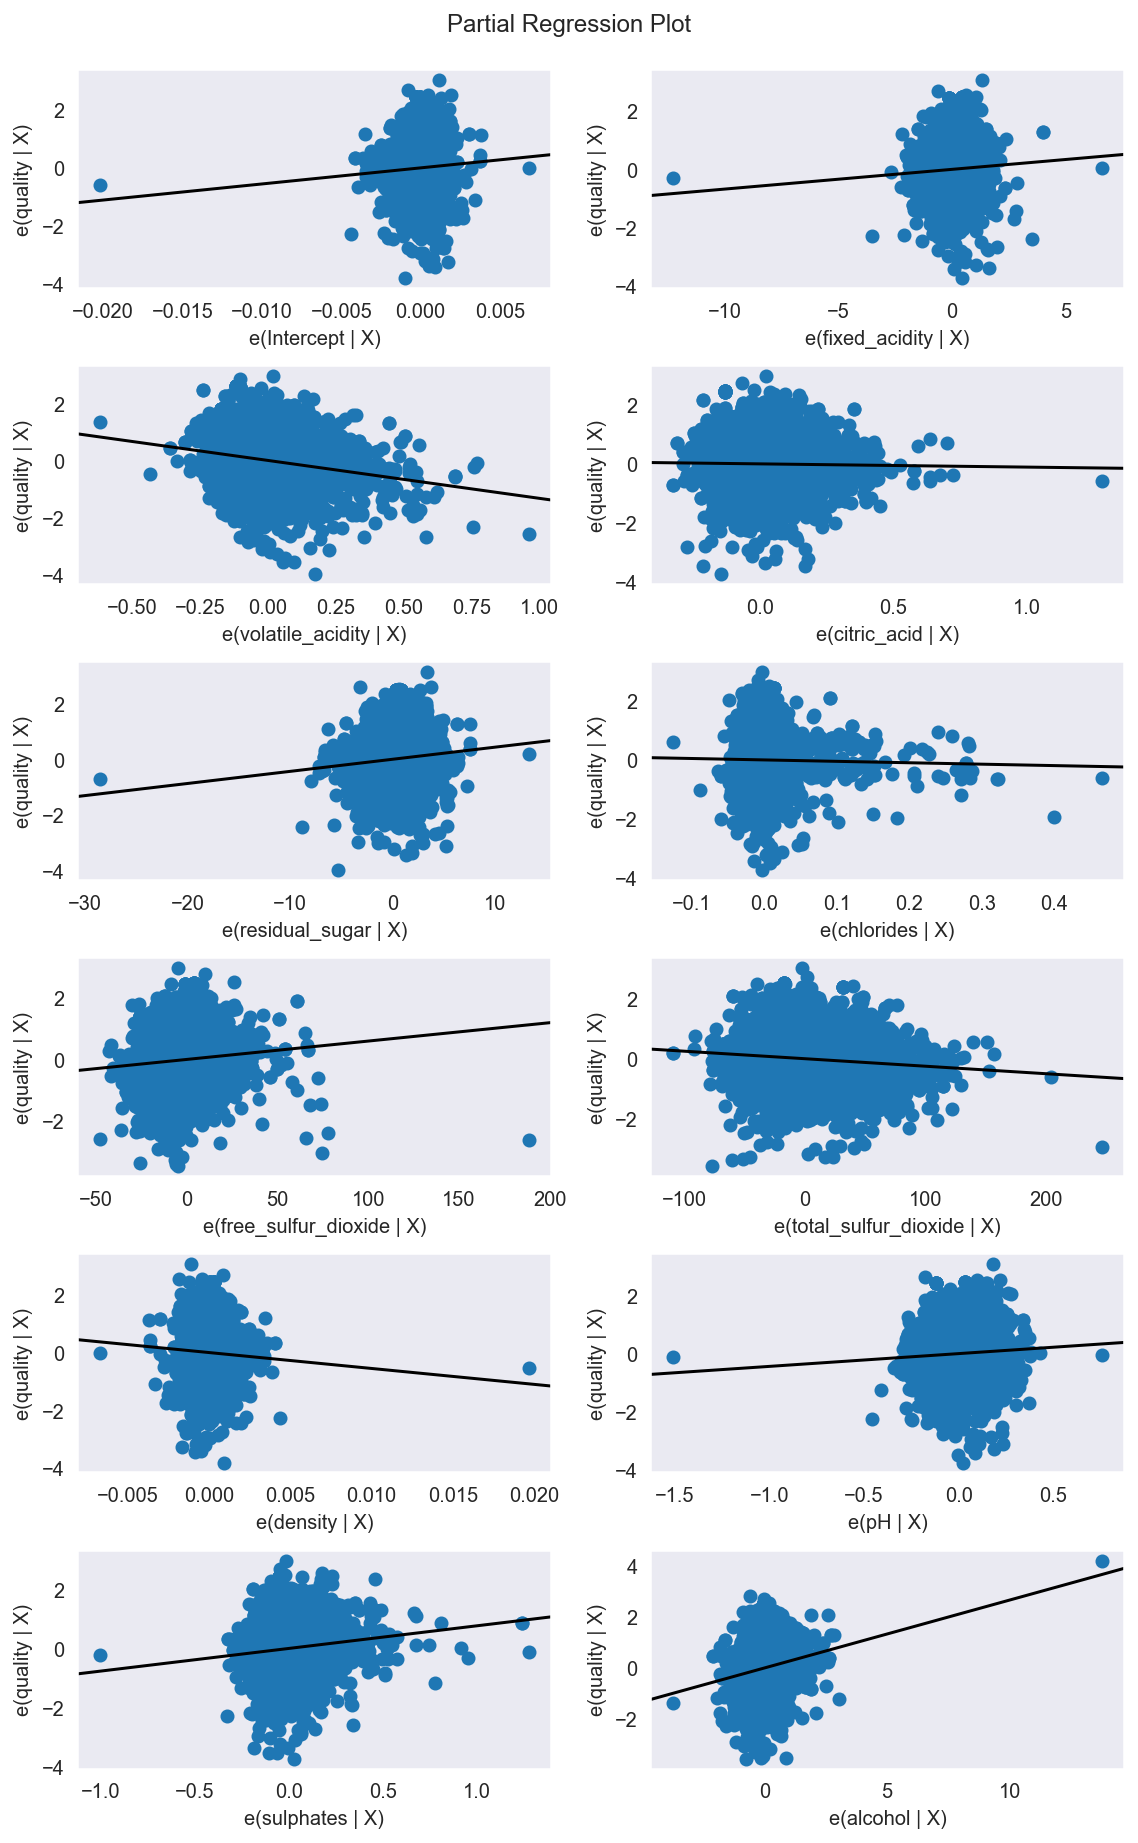

In [26]:
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()